In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, plot_precision_recall_curve, precision_score, recall_score

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

# Analysing the data

In [6]:
df = pd.read_csv('../creditcard.csv')

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df.shape

(284807, 31)

checking datatype and missing values: no missing values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
df['Time_diff'] = df['Time'].diff()

In [11]:
df.loc[:, ['Time', 'Time_diff']].head(10)

,Time,Time_diff
0,0.0,NaN
1,0.0,0.0
2,1.0,1.0
3,1.0,0.0
4,2.0,1.0
5,2.0,0.0
6,4.0,2.0
7,7.0,3.0
8,7.0,0.0
9,9.0,2.0


In [12]:
df.fillna(value = 0, inplace=True)

In [13]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_diff
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,3.061663e-02,-2.476894e-01,1.243481e-01,-6.590202e-02,-9.875682e-02,-1.834533e-01,1.190287e-02,-7.329721e-02,9.043813e-02,2.897530e-02,-5.086602e-02,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323,-0.102081
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,7.433820e-17,2.438580e-16,2.422086e-16,-2.115458e-16,9.352582e-16,-3.252451e-16,6.308789e-16,-5.011524e-16,2.870125e-16,1.818128e-16,1.036959e-16,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347,-0.008074
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,-4.782388e-16,9.468995e-16,-6.588252e-16,3.854521e-16,-2.541036e-16,2.831060e-16,4.934097e-17,-9.883008e-16,2.636654e-16,9.528280e-17,-9.309954e-16,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289,0.024858
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,6.289267e-16,-5.501758e-17,2.206522e-16,-6.883375e-16,4.271336e-16,1.122756e-16,1.183364e-15,4.576619e-17,5.427965e-16,2.576773e-16,-9.429297e-16,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961,0.019989
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,6.055490e-16,-2.083600e-16,-5.657963e-16,-1.506129e-16,-8.522435e-17,-1.507718e-16,-6.939204e-16,-4.397925e-16,1.493667e-16,-2.656938e-16,-3.223123e-16,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447,0.039772
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,-6.601716e-16,7.342759e-16,3.761033e-16,-9.578659e-16,-3.634803e-16,-5.132620e-16,-3.517076e-16,1.425729e-16,1.109525e-15,-3.138234e-16,2.076048e-16,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974,0.020337
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,2.850776e-16,4.865799e-16,2.140589e-16,-2.268061e-16,3.452801e-16,-6.368111e-18,-2.477917e-16,3.567582e-16,2.811474e-16,2.717167e-16,1.898638e-16,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643,0.007611
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,3.043333e-17,-1.084105e-15,1.510045e-15,-9.892325e-17,-1.729462e-16,1.936832e-17,2.893672e-16,1.149692e-15,-1.116789e-16,-2.874017e-16,1.744242e-16,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257,-0.002922
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,9.051847e-17,1.954747e-16,-6.266057e-17,-2.382948e-16,-1.131098e-16,2.021491e-16,5.027192e-16,-3.508777e-16,-4.093852e-16,-5.339821e-16,-1.095534e-16,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875,-0.011406
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e

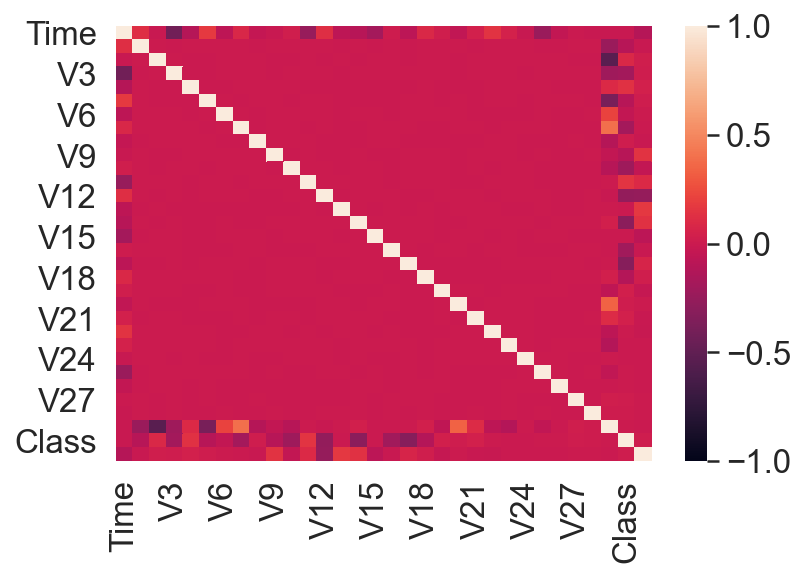

In [14]:
sns.heatmap(df.corr(), vmin = -1, vmax = 1)
plt.show()

In [15]:
df.loc[:,['Time','Time_diff', 'Amount', 'V1', 'V2', 'Class']].corr()

,Time,Time_diff,Amount,V1,V2,Class
Time,1.000000,-0.102081,-0.010596,1.173963e-01,-1.059333e-02,-0.012323
Time_diff,-0.102081,1.000000,-0.006227,-8.073963e-03,2.485767e-02,0.018983
Amount,-0.010596,-0.006227,1.000000,-2.277087e-01,-5.314089e-01,0.005632
V1,0.117396,-0.008074,-0.227709,1.000000e+00,4.697350e-17,-0.101347
V2,-0.010593,0.024858,-0.531409,4.697350e-17,1.000000e+00,0.091289
Class,-0.012323,0.018983,0.005632,-1.013473e-01,9.128865e-02,1.000000


In [16]:
df.iloc[:, [0,1,2,-3,-2,-1]].corr()

,Time,V1,V2,Amount,Class,Time_diff
Time,1.000000,1.173963e-01,-1.059333e-02,-0.010596,-0.012323,-0.102081
V1,0.117396,1.000000e+00,4.697350e-17,-0.227709,-0.101347,-0.008074
V2,-0.010593,4.697350e-17,1.000000e+00,-0.531409,0.091289,0.024858
Amount,-0.010596,-2.277087e-01,-5.314089e-01,1.000000,0.005632,-0.006227
Class,-0.012323,-1.013473e-01,9.128865e-02,0.005632,1.000000,0.018983
Time_diff,-0.102081,-8.073963e-03,2.485767e-02,-0.006227,0.018983,1.000000


In [17]:
df.corr().loc[:,'Class'].sort_values()

V17         -0.326481
V14         -0.302544
V12         -0.260593
V10         -0.216883
V16         -0.196539
V3          -0.192961
V7          -0.187257
V18         -0.111485
V1          -0.101347
V9          -0.097733
V5          -0.094974
V6          -0.043643
Time        -0.012323
V24         -0.007221
V13         -0.004570
V15         -0.004223
V23         -0.002685
V22          0.000805
V25          0.003308
V26          0.004455
Amount       0.005632
V28          0.009536
V27          0.017580
Time_diff    0.018983
V8           0.019875
V20          0.020090
V19          0.034783
V21          0.040413
V2           0.091289
V4           0.133447
V11          0.154876
Class        1.000000
Name: Class, dtype: float64

In [18]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_diff
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727,0.606699
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527,1.053380
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000,1.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000,32.000000


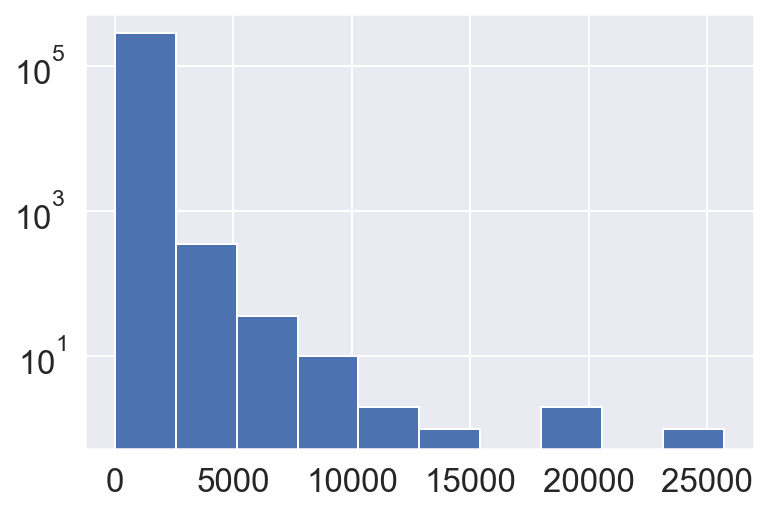

In [19]:
plt.hist(df['Amount'])
plt.yscale('log')
plt.show()

In [20]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [21]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

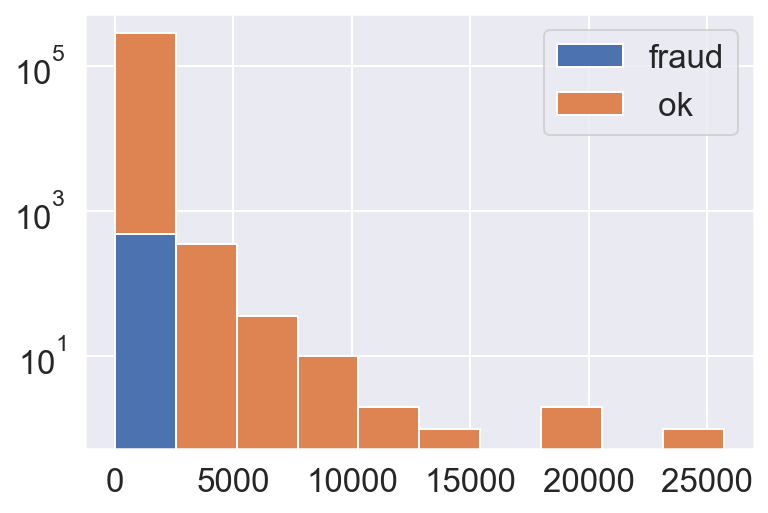

In [22]:
plt.hist(x = [df[df['Class']==1]['Amount'], df[df['Class']==0]['Amount']],bins=10, stacked=True, label = ['fraud', ' ok'])
plt.yscale('log')
plt.legend(loc='best')
plt.show()

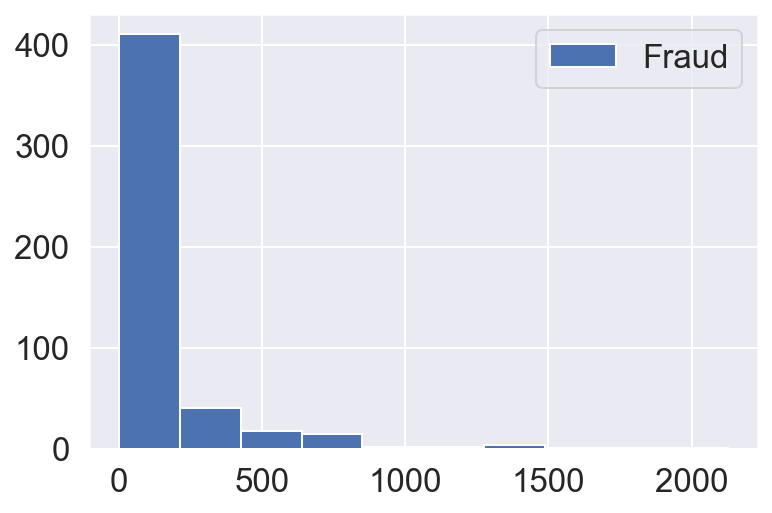

In [23]:
plt.hist(x = df[df['Class']==1]['Amount'],bins=10, label = 'Fraud')
plt.legend(loc = 'best')
plt.show()

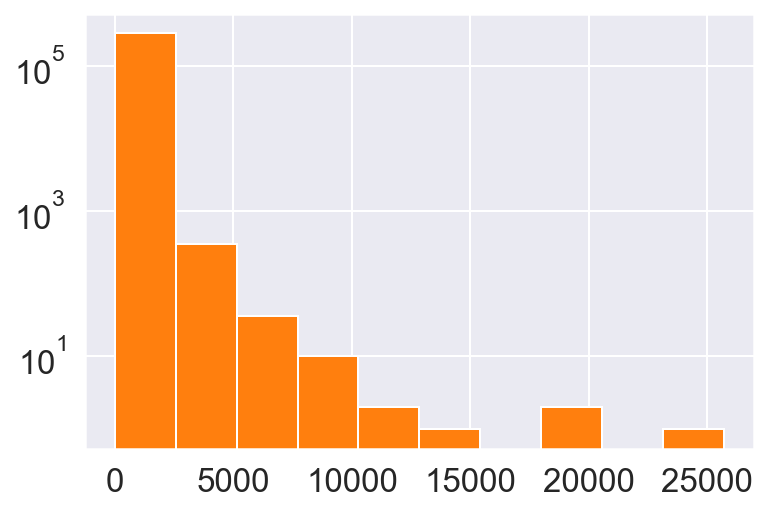

In [24]:
plt.hist(x = df[df['Class']==0]['Amount'],bins=10, color='tab:orange')
plt.yscale('log')
plt.show()

In [25]:
y = df.pop('Class')

In [26]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_diff
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,1.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,1.0


In [27]:
df_train, df_test, y_train, y_test = train_test_split(df, y, test_size = 0.2, random_state=42, stratify =y )

In [28]:
y_train.value_counts(normalize=True)

0    0.998271
1    0.001729
Name: Class, dtype: float64

In [29]:
y_test.value_counts(normalize=True)

0    0.99828
1    0.00172
Name: Class, dtype: float64

In [30]:
y_test.value_counts()

0    56864
1       98
Name: Class, dtype: int64

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(df_train)
X_test = scaler.transform(df_test)

In [32]:
X_train = pd.DataFrame(X_train, index=df_train.index, columns=df_train.columns)
X_test = pd.DataFrame(X_test, index=df_test.index, columns=df_test.columns)

# Model fitter funtions

In [33]:
def gridsearch_fitter(base_estimator, paramgrid, Xtrain, ytrain):
    gridsearchmodel = GridSearchCV(base_estimator, paramgrid, scoring='precision', cv=5, return_train_score=True)
    gridsearchmodel.fit(Xtrain, ytrain)
    print("best estimator:", gridsearchmodel.best_estimator_)
    print("best parameters:", gridsearchmodel.best_params_)
    print("bet score - precision:", gridsearchmodel.best_score_)

In [34]:
def model_fitter(model, Xtrain, ytrain, Xtest, ytest, feature_importance=False):
    model.fit(Xtrain, ytrain)
    print('precision', cross_val_score(model, Xtrain, ytrain, cv=5, scoring='precision').mean())
    print('recall', cross_val_score(model, Xtrain, ytrain, cv=5, scoring='recall').mean())
    print('accuracy', cross_val_score(model, Xtrain, ytrain, cv=5, scoring='accuracy').mean())
    print('f1', cross_val_score(model, Xtrain, ytrain, cv=5, scoring='f1').mean())
    print(classification_report(ytrain, model.predict(Xtrain)))
    plot_confusion_matrix(model, Xtrain, ytrain, cmap='Blues')
    plt.grid(b=None)
    plt.show()
    
    plot_precision_recall_curve(model, Xtrain, ytrain)
    plt.title("precision - recall curve")
    plt.show()
    
    print(classification_report(ytest, model.predict(Xtest)))
    plot_confusion_matrix(model, Xtest, ytest, cmap='Blues')
    plt.grid(b=None)
    plt.show()
    
    if feature_importance == True:
        feat_imp = pd.DataFrame(model.feature_importances_, index = Xtrain.columns, columns=['importance']).sort_values(by='importance', ascending=False)
        feat_imp.head(10).plot(kind='barh', title='Feature Importances - top 10')
        plt.ylabel('Feature Importance Score')
    return model

In [35]:
def predict_at_threshold(x, threshold = 0.5):
    '''this function will predict class 1 at the desired threshold, if not specifed: defaults to th0.5'''
    if x>=threshold:
        return 1
    else:
        return 0

In [105]:
def plotter(y_true, results_probability_class1, best=False):
    '''this function will plot the precision and recall at different thresholds'''
    thresholds = np.linspace(0.0001, 0.999, 100)
    prec_dict={}
    recall_dict={}
    for t in thresholds:
        prec_dict[t]= precision_score(y_true, results_probability_class1.apply(predict_at_threshold, threshold=t))
        recall_dict[t]= recall_score(y_true, results_probability_class1.apply(predict_at_threshold, threshold=t))

    plt.plot(list(prec_dict.keys()), list(prec_dict.values()), label = 'precision')
    plt.plot(list(recall_dict.keys()), list(recall_dict.values()), label = 'recall')
    plt.xlabel('threshold')
    plt.legend(loc='best')
    plt.title('change in threshold')
    plt.show()
    
    if best==True:
        print('highest precision at threshold: ', max(prec_dict.items(), key=lambda k: k[1])[0])

# Logistic Regression - base sample

In [36]:
logreg=LogisticRegression(penalty= 'l2', solver = 'lbfgs', random_state=42, max_iter=10000)

In [37]:
gs_dict={'C': [10**(-i) for i in range(5)] +[10**j for j in range(5)]}

## Grid search on precision

In [38]:
gridsearch_fitter(logreg, gs_dict, X_train, y_train)

best estimator: LogisticRegression(C=0.01, max_iter=10000, random_state=42)
best parameters: {'C': 0.01}
bet score - precision: 0.894162393162393


In [39]:
logreg_tuned = LogisticRegression(C=0.01, penalty= 'l2', solver = 'lbfgs', random_state=42, max_iter=10000)

precision 0.894162393162393
recall 0.5988964621876014
accuracy 0.9991836555553117
f1 0.7171224233186868
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.91      0.61      0.73       394

    accuracy                           1.00    227845
   macro avg       0.95      0.80      0.86    227845
weighted avg       1.00      1.00      1.00    227845



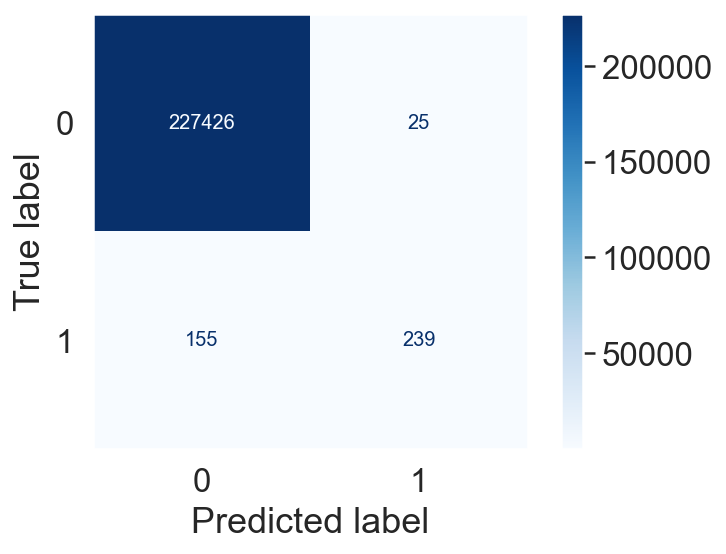

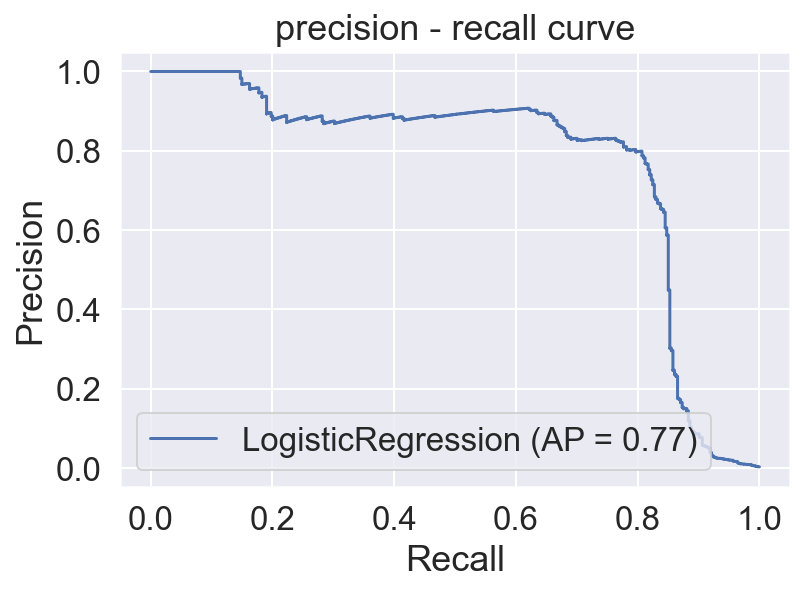

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.61      0.70        98

    accuracy                           1.00     56962
   macro avg       0.91      0.81      0.85     56962
weighted avg       1.00      1.00      1.00     56962



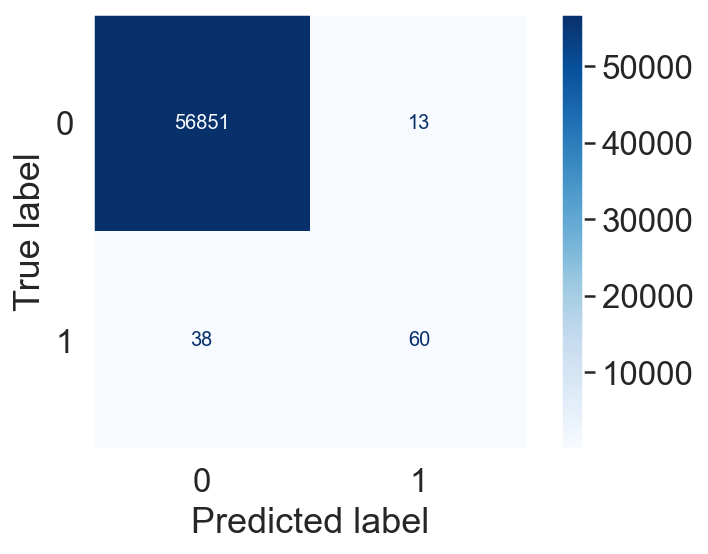

In [40]:
my_model_logreg = model_fitter(logreg_tuned, X_train, y_train, X_test, y_test)

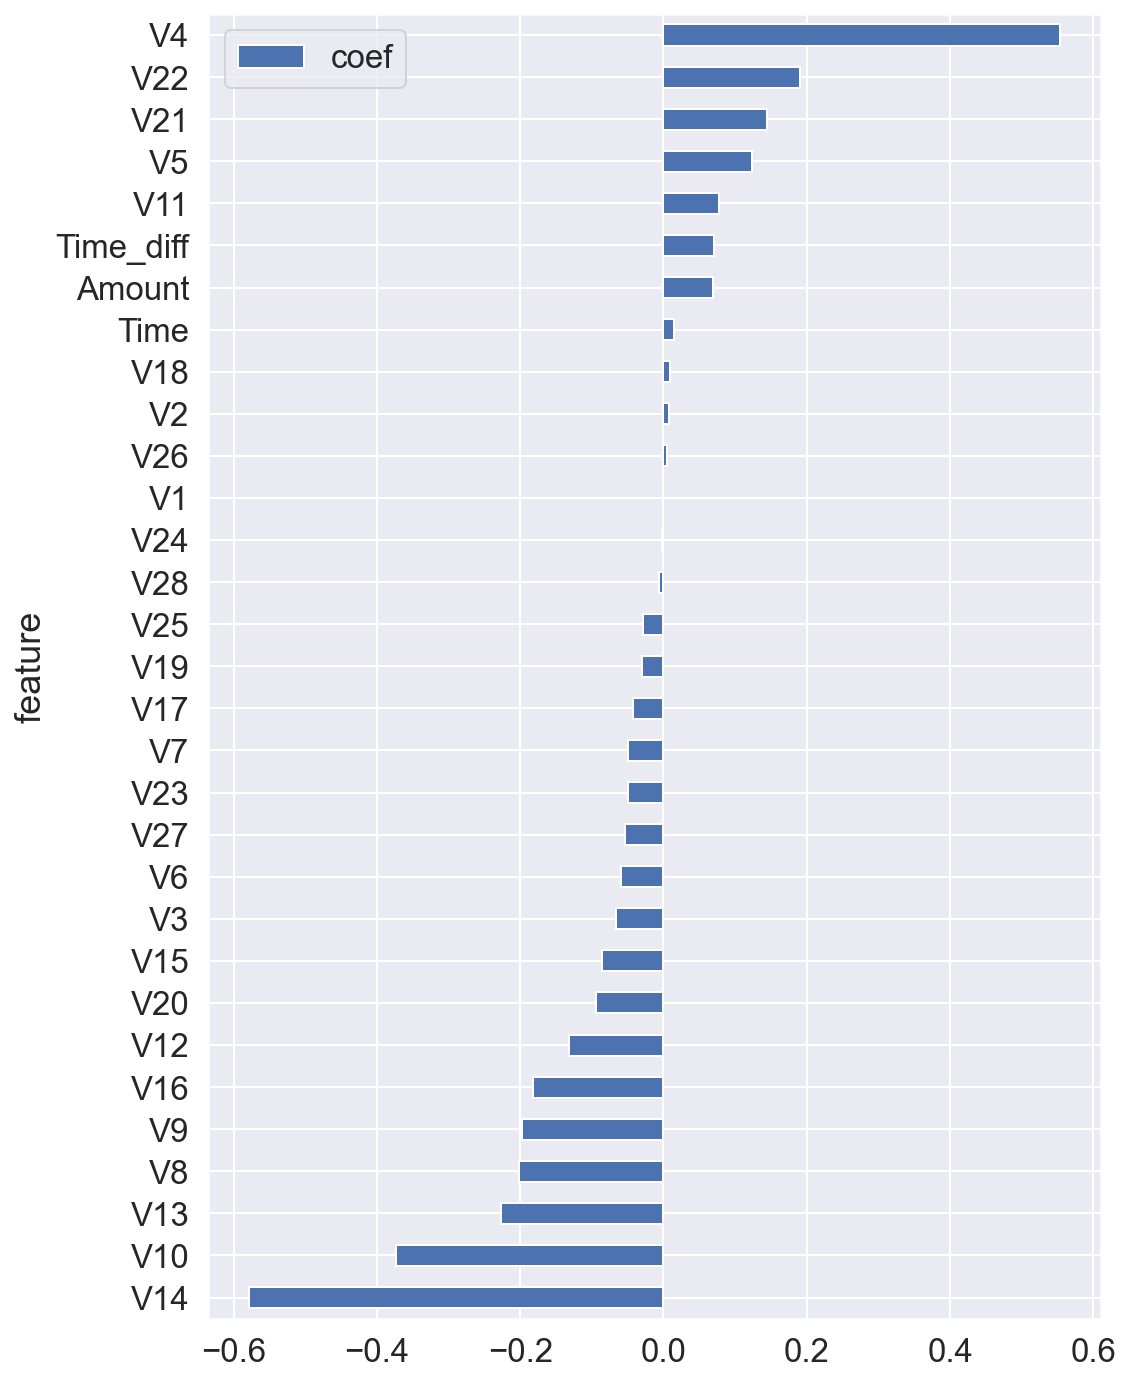

In [41]:
pd.DataFrame(list(zip(X_train.columns, my_model_logreg.coef_[0])), 
             columns=['feature', 'coef'])\
    .sort_values(by='coef') \
    .plot(kind='barh', x='feature', y='coef', figsize=(8, 12))
plt.show()

# Undersampling

In [42]:
undersampler = RandomUnderSampler(sampling_strategy=1, random_state=42)

In [43]:
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

In [44]:
X_train.shape

(227845, 31)

In [45]:
y_train.shape

(227845,)

In [46]:
X_train_under.shape

(788, 31)

In [47]:
y_train_under.shape

(788,)

## Logistic regression Grid search on precision

In [48]:
gridsearch_fitter(logreg, gs_dict, X_train_under, y_train_under)

best estimator: LogisticRegression(C=0.001, max_iter=10000, random_state=42)
best parameters: {'C': 0.001}
bet score - precision: 1.0


In [49]:
logreg_under_tuned = LogisticRegression(C=0.001, penalty= 'l2', solver = 'lbfgs', random_state=42, max_iter=10000)

precision 1.0
recall 0.8197663096397274
accuracy 0.9099088930097556
f1 0.9003415828866007
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       394
           1       1.00      0.82      0.90       394

    accuracy                           0.91       788
   macro avg       0.92      0.91      0.91       788
weighted avg       0.92      0.91      0.91       788



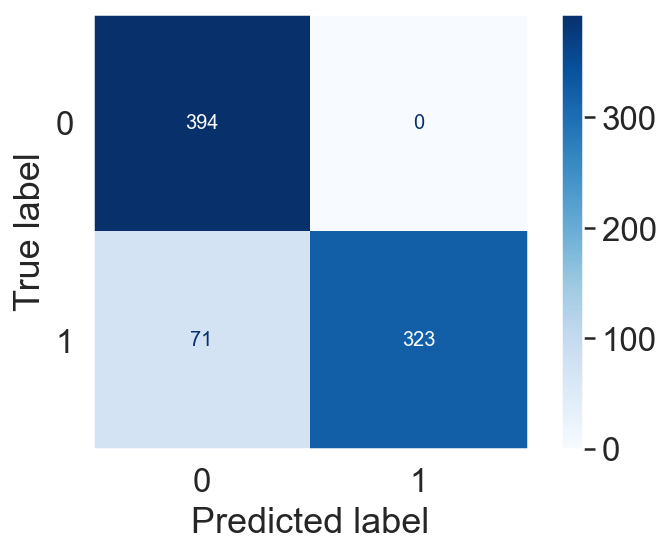

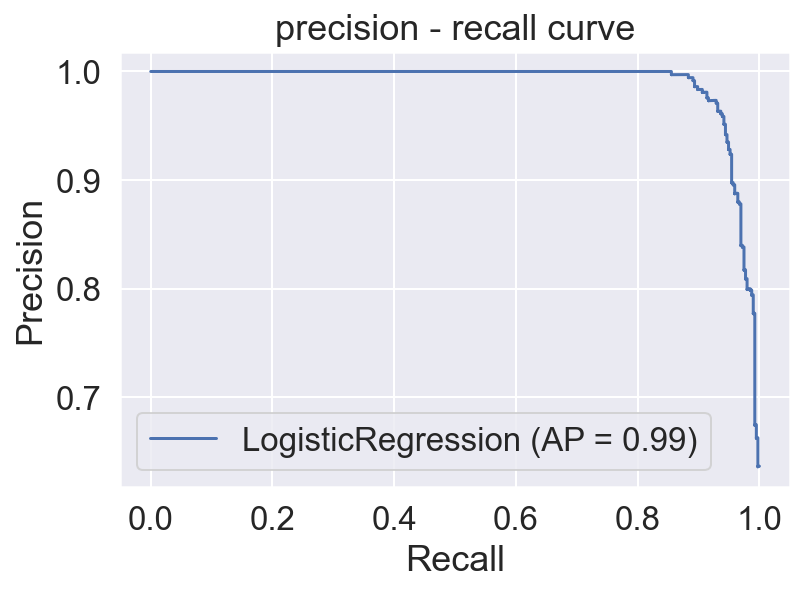

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.62      0.85      0.72        98

    accuracy                           1.00     56962
   macro avg       0.81      0.92      0.86     56962
weighted avg       1.00      1.00      1.00     56962



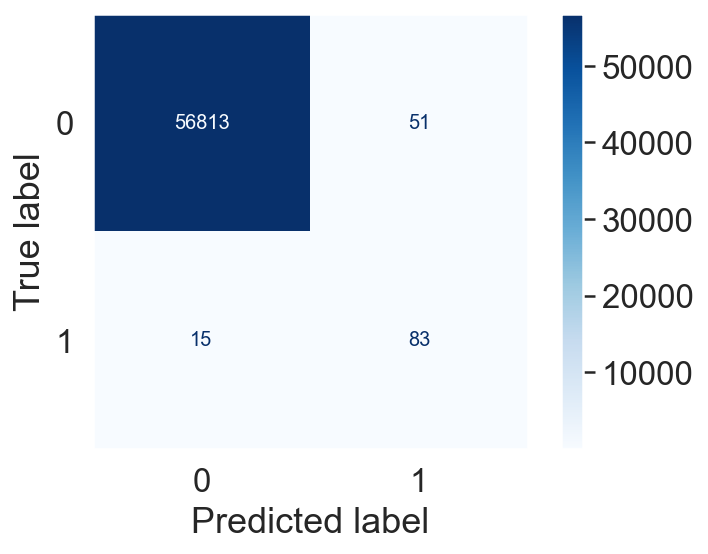

In [50]:
my_model_logreg_under = model_fitter(logreg_under_tuned, X_train_under, y_train_under, X_test, y_test)

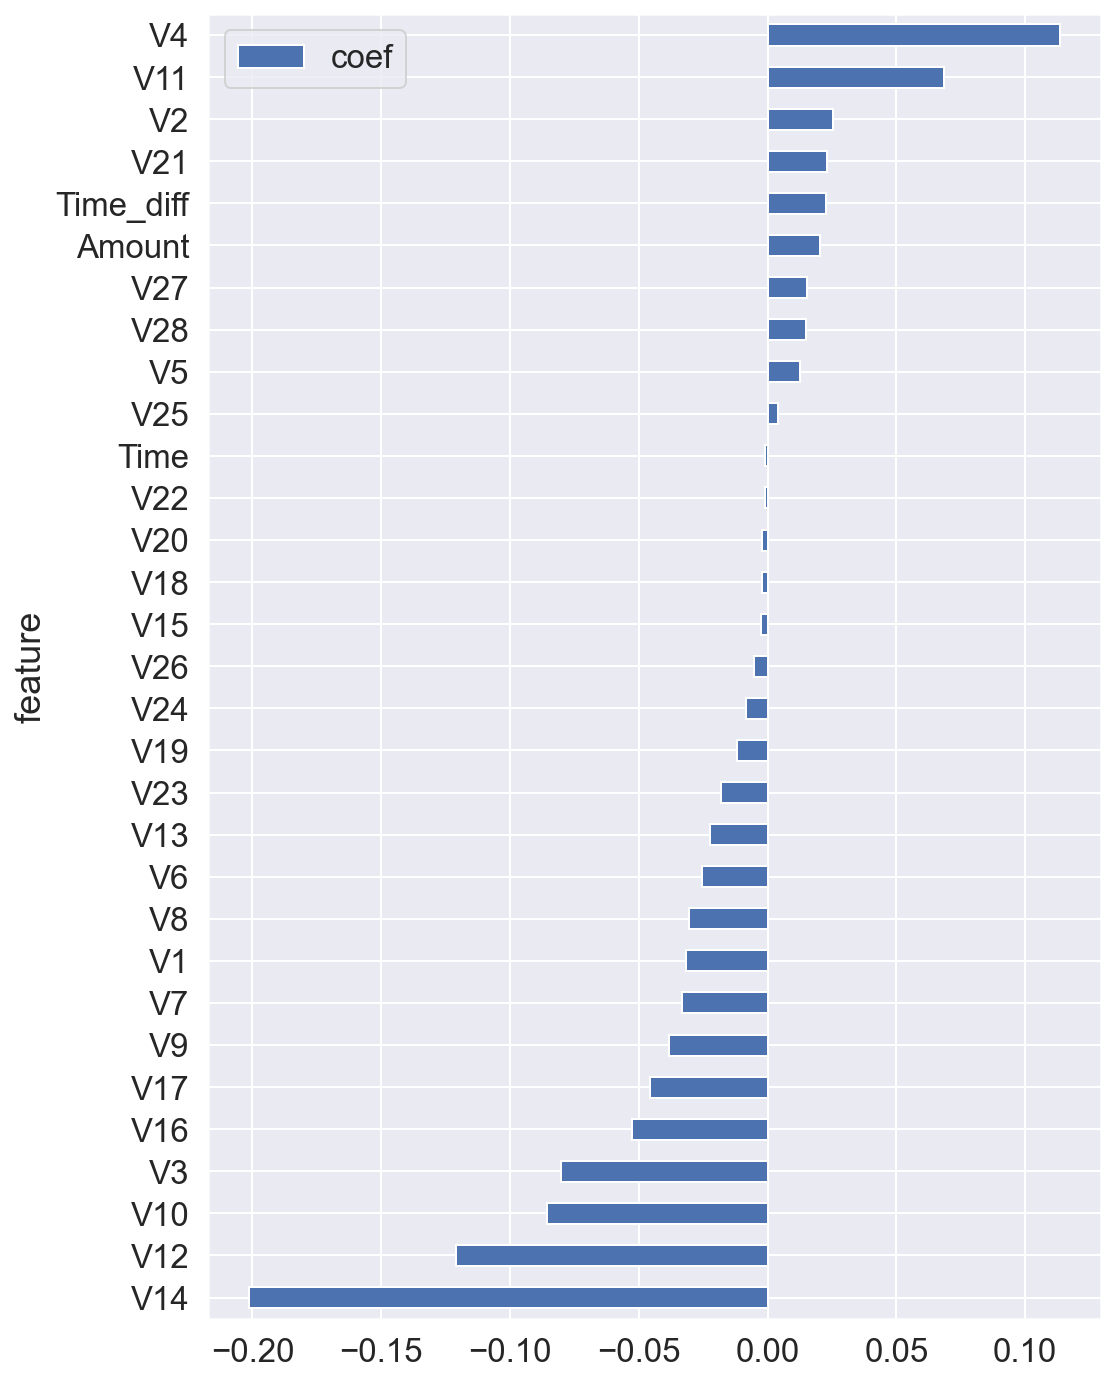

In [51]:
pd.DataFrame(list(zip(X_train_under.columns, my_model_logreg_under.coef_[0])), 
             columns=['feature', 'coef'])\
    .sort_values(by='coef') \
    .plot(kind='barh', x='feature', y='coef', figsize=(8, 12))
plt.show()

In [52]:
X_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_diff
263020,1.387182,-0.344711,0.854160,-0.732691,-0.938188,1.006709,-0.982011,1.522739,-0.515157,0.283365,0.599445,-0.840855,-0.233495,-0.200507,0.278695,-0.051673,-0.846823,-0.717819,-0.468039,-0.200646,0.512868,0.108461,1.115741,-0.357621,1.169920,-0.259349,0.093323,1.318509,0.890582,-0.259954,-0.573562
11378,-1.580138,-1.444985,-1.676482,1.675044,-0.758943,2.060346,-1.616843,-1.449899,-0.209476,2.800206,-0.920625,1.816752,-1.557939,1.260265,1.008412,-0.526445,-0.167287,-0.248413,1.262221,0.487012,-0.667829,-0.402639,0.150196,-1.296302,0.071488,-0.051808,-1.888984,0.273804,-1.566325,-0.304426,0.371132
147283,-0.138120,-1.826153,1.406172,0.862785,2.305083,0.817390,2.153234,1.166033,-0.603022,1.707154,6.811400,2.042718,-0.067097,0.581479,-2.542014,1.644828,-1.414793,-0.462899,-1.468473,0.120496,2.641118,-1.442963,0.022825,-0.210559,-2.451129,-0.566646,0.130092,1.364378,1.558733,-0.048286,0.371132
219439,0.986536,1.051390,-0.009036,-0.714162,0.272652,-0.017764,-0.806605,0.167725,-0.283434,0.414079,0.044418,-0.639434,0.750734,0.670049,0.165971,0.029071,-0.194572,-0.345424,-1.202314,0.118409,-0.247826,-0.383767,-0.881492,0.528783,-0.111191,-0.542979,0.422051,-0.156942,-0.184227,-0.347741,-0.573562
36939,-1.182272,0.617263,0.839727,-0.886397,1.245639,0.479989,-1.586680,0.689553,-0.399109,-0.574439,-1.453869,1.435796,0.206828,0.739392,-3.701464,1.011136,0.956371,3.370570,1.240823,-1.285034,0.013080,-0.223665,-0.452778,-0.246537,1.023799,1.572523,-0.686087,0.115955,0.319244,-0.345707,-0.573562


In [53]:
results_lr_under_train=pd.DataFrame(logreg_under_tuned.predict_proba(X_train_under), columns=['lr_under_0_pp','lr_under_1_pp'], index=X_train_under.index)

In [54]:
results_lr_under_test=pd.DataFrame(logreg_under_tuned.predict_proba(X_test), columns=['lr_under_0_pp','lr_under_1_pp'], index=df_test.index)

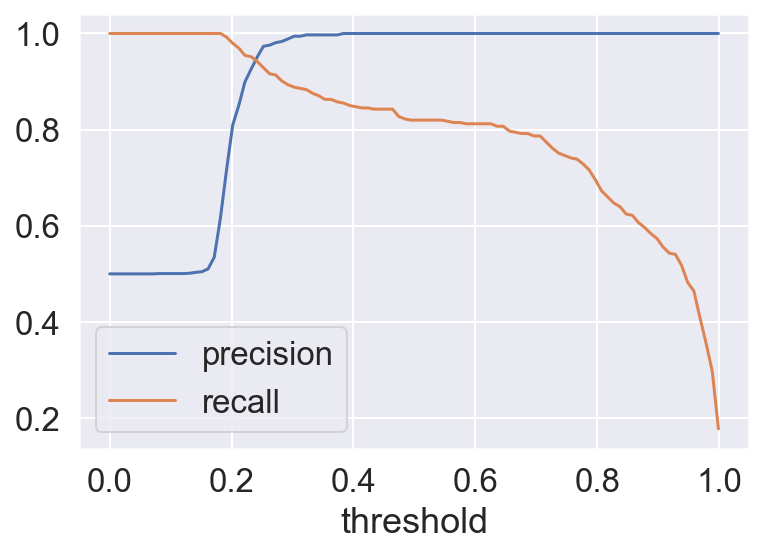

highest precision at threshold:  0.38351616161616164


In [103]:
plotter(y_train_under, results_lr_under_train.lr_under_1_pp, best=True)

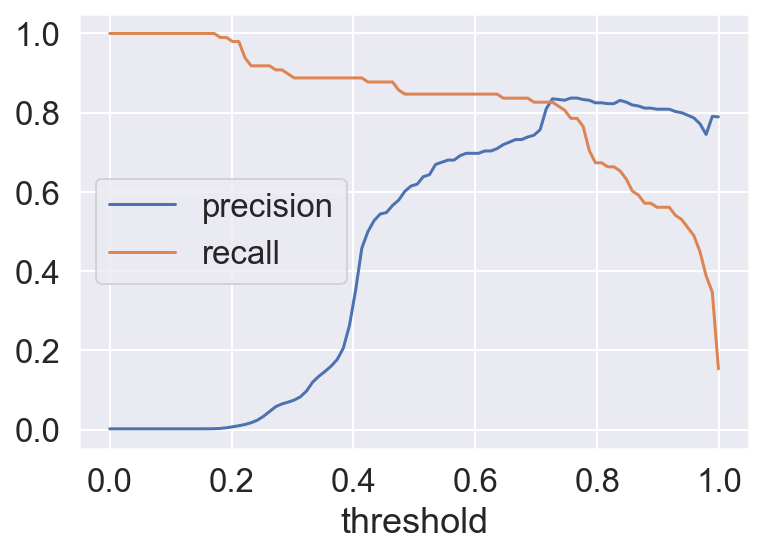

highest precision at threshold:  0.7568424242424243


In [104]:
plotter(y_test, results_lr_under_test.lr_under_1_pp, best=True)

In [75]:
list(prec_dict.items())[25:55]

[(0.25234747474747476, 0.973404255319149),
 (0.26243737373737375, 0.9756756756756757),
 (0.27252727272727273, 0.9809264305177112),
 (0.2826171717171717, 0.9833795013850416),
 (0.29270707070707075, 0.9887640449438202),
 (0.30279696969696973, 0.9943181818181818),
 (0.3128868686868687, 0.9943019943019943),
 (0.3229767676767677, 0.997134670487106),
 (0.3330666666666667, 0.9971098265895953),
 (0.34315656565656566, 0.997093023255814),
 (0.35324646464646464, 0.9970674486803519),
 (0.3633363636363637, 0.9970674486803519),
 (0.37342626262626266, 0.9970501474926253),
 (0.38351616161616164, 1.0),
 (0.3936060606060606, 1.0),
 (0.4036959595959596, 1.0),
 (0.4137858585858586, 1.0),
 (0.42387575757575763, 1.0),
 (0.4339656565656566, 1.0),
 (0.4440555555555556, 1.0),
 (0.4541454545454546, 1.0),
 (0.46423535353535356, 1.0),
 (0.47432525252525254, 1.0),
 (0.4844151515151516, 1.0),
 (0.49450505050505056, 1.0),
 (0.5045949494949495, 1.0),
 (0.5146848484848485, 1.0),
 (0.5247747474747475, 1.0),
 (0.5348646

In [74]:
list(recall_dict.items())[25:55]

[(0.25234747474747476, 0.9289340101522843),
 (0.26243737373737375, 0.916243654822335),
 (0.27252727272727273, 0.9137055837563451),
 (0.2826171717171717, 0.9010152284263959),
 (0.29270707070707075, 0.8934010152284264),
 (0.30279696969696973, 0.8883248730964467),
 (0.3128868686868687, 0.8857868020304569),
 (0.3229767676767677, 0.883248730964467),
 (0.3330666666666667, 0.8756345177664975),
 (0.34315656565656566, 0.8705583756345178),
 (0.35324646464646464, 0.8629441624365483),
 (0.3633363636363637, 0.8629441624365483),
 (0.37342626262626266, 0.8578680203045685),
 (0.38351616161616164, 0.8553299492385786),
 (0.3936060606060606, 0.850253807106599),
 (0.4036959595959596, 0.8477157360406091),
 (0.4137858585858586, 0.8451776649746193),
 (0.42387575757575763, 0.8451776649746193),
 (0.4339656565656566, 0.8426395939086294),
 (0.4440555555555556, 0.8426395939086294),
 (0.4541454545454546, 0.8426395939086294),
 (0.46423535353535356, 0.8426395939086294),
 (0.47432525252525254, 0.8274111675126904),
 (

In [69]:
confusion_matrix(y_train_under, results_lr_under_train.lr_under_1_pp.apply(predict_at_threshold, threshold=0.30279696969696973))

array([[392,   2],
       [ 44, 350]])

In [70]:
confusion_matrix(y_test, results_lr_under_test.lr_under_1_pp.apply(predict_at_threshold, threshold=0.30279696969696973))

array([[55780,  1084],
       [   11,    87]])

In [76]:
confusion_matrix(y_train_under, results_lr_under_train.lr_under_1_pp.apply(predict_at_threshold, threshold=0.38))

array([[394,   0],
       [ 57, 337]])

In [77]:
confusion_matrix(y_test, results_lr_under_test.lr_under_1_pp.apply(predict_at_threshold, threshold=0.38))

array([[56502,   362],
       [   11,    87]])

In [72]:
confusion_matrix(y_train_under, results_lr_under_train.lr_under_1_pp.apply(predict_at_threshold, threshold=0.5))

array([[394,   0],
       [ 71, 323]])

In [73]:
confusion_matrix(y_test, results_lr_under_test.lr_under_1_pp.apply(predict_at_threshold, threshold=0.5))

array([[56813,    51],
       [   15,    83]])

In [91]:
max(prec_dict_test.items(), key=lambda k: k[1])[0]


0.7568424242424243

In [92]:
confusion_matrix(y_train_under, results_lr_under_train.lr_under_1_pp.apply(predict_at_threshold, threshold=0.7568424242424243))

array([[394,   0],
       [102, 292]])

In [93]:
confusion_matrix(y_test, results_lr_under_test.lr_under_1_pp.apply(predict_at_threshold, threshold=0.7568424242424243))

array([[56849,    15],
       [   21,    77]])

In [99]:
confusion_matrix(y_test, results_lr_under_test.lr_under_1_pp.apply(predict_at_threshold, threshold=0.73))

array([[56848,    16],
       [   17,    81]])

In [ ]:
####################################

In [ ]:
logreg_under_trial = LogisticRegression(C=0.0001, penalty= 'l2', solver = 'lbfgs', random_state=42, max_iter=10000)

In [ ]:
my_model_logreg_under_trial = model_fitter(logreg_under_trial, X_train_under, y_train_under, X_test, y_test)

In [ ]:
logreg_under_trial2 = LogisticRegression(C=0.00001, penalty= 'l2', solver = 'lbfgs', random_state=42, max_iter=10000)

In [ ]:
my_model_logreg_under_trial2 = model_fitter(logreg_under_trial2, X_train_under, y_train_under, X_test, y_test)

In [ ]:
logreg_under_trial3 = LogisticRegression(C=0.000001, penalty= 'l2', solver = 'lbfgs', random_state=42, max_iter=10000)

In [ ]:
my_model_logreg_under_trial3 = model_fitter(logreg_under_trial3, X_train_under, y_train_under, X_test, y_test)

## Decision tree

In [ ]:
dt=DecisionTreeClassifier(random_state=42)

In [ ]:
model_fitter(dt,X_train_under, y_train_under, X_test, y_test, feature_importance=True)

In [ ]:
gs_dt_dict={'max_depth':[None] + [i for i in range(1,20)]}

In [ ]:
gridsearch_fitter(dt, gs_dt_dict, X_train_under, y_train_under)

In [ ]:
dt_tuned=DecisionTreeClassifier(max_depth=1, random_state=42)

In [ ]:
model_fitter(dt_tuned, X_train_under, y_train_under, X_test, y_test, feature_importance=True)

## Random forest

In [ ]:
rf_under = RandomForestClassifier(random_state=42)

In [ ]:
model_fitter(rf_under, X_train_under, y_train_under, X_test, y_test, feature_importance=True)

In [ ]:
gs_rf_dict={'bootstrap':[True, False],
           'max_depth': [None] + [i for i in range(1,20)],
           'max_features': ['auto', 10, 15, 31]}

In [ ]:
gridsearch_fitter(rf_under, gs_rf_dict, X_train_under, y_train_under)

In [ ]:
rf_tuned=RandomForestClassifier(bootstrap= True, max_depth = 1,max_features= 'auto', random_state=42)

In [ ]:
model_fitter(rf_tuned, X_train_under, y_train_under, X_test, y_test, feature_importance=True)

In [ ]:
gs_rf_dict2={'bootstrap':[True, False],
           'max_depth': [None] + [i for i in range(2,20)],
           'max_features': ['auto', 10, 15, 31],
           'min_samples_split':[2, 5,10],
           'max_leaf_nodes': [None, 5, 10]}

In [ ]:
gridsearch_fitter(rf_under, gs_rf_dict2, X_train_under, y_train_under)

In [ ]:
rf_tuned2=RandomForestClassifier(bootstrap= True, max_depth = 4,max_features= 'auto', max_leaf_nodes= None, min_samples_split = 5,random_state=42)

In [ ]:
model_fitter(rf_tuned2, X_train_under, y_train_under, X_test, y_test, feature_importance=True)

## Boosting

In [ ]:
gb=GradientBoostingClassifier(max_depth=1, random_state=42)

In [ ]:
model_fitter(gb, X_train_under, y_train_under, X_test, y_test)

In [ ]:
gs_gb_dict={'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2],
           'max_depth': [1,2,3]}

In [ ]:
gridsearch_fitter(gb, gs_gb_dict, X_train_under, y_train_under)

In [ ]:
gb_tuned=GradientBoostingClassifier(max_depth=2, learning_rate =0.001 , random_state=42)

In [ ]:
model_fitter(gb_tuned, X_train_under, y_train_under, X_test, y_test, feature_importance=True)